<a href="https://colab.research.google.com/github/parhambarazesh/PET575/blob/master/Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

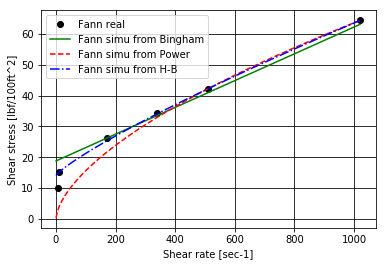

In [0]:
from scipy.optimize import fsolve
import math
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

# Fann readings

theta=np.array([60.4,39.6,32.1,24.5,14.2,9.4])
gamma=np.array([600,300,200,100,6,3])

# conversional factors

k1=1.067        #in lbf/100ft^2
k2=1.7023       # s^-1
k3=478.8        # convert lbf/100ft^2 to cPoise

#  unit conversion

theta_cp=k1*theta
gamma_s=k2*gamma

gamma_c=np.arange(0.1*k2,600*k2,5) #varying shear rate

# Bingham Plastic Model

pv_BP=theta[0]-theta[1]
tau0_BP=theta[1]-pv_BP

tau_BP = tau0_BP + pv_BP/k3*gamma_c           #lbf/100ft^2

# Power Law Model

n_PL=np.log((theta[0]/theta[1]))/np.log((gamma[0]/gamma[1]))
K_PL=k1*theta[0]/((gamma[0]*k2)**n_PL)

tau_PL = K_PL*(gamma_c)**n_PL           #lbf/100ft^2

# Herschel Bulkley Model

theta_cp_n=[theta_cp[0],theta_cp[1],theta_cp[4]]
gamma_s_n=[gamma_s[0],gamma_s[1],gamma_s[4]]

#Coefficient_HB=HB(theta_cp_n,gamma_s_n); #solve the nonlinear equations to get tau0, K and n

#tau0_HB=Coefficient_HB(1);
#K_HB=Coefficient_HB(2);
#n_HB=Coefficient_HB(3);

#tau_HB = tau0_HB+ K_HB*(gamma_c).^n_HB;           %lbf/100ft^2


def equations(p):
    x, y, z = p
    theta=np.array([60.4,39.6,32.1,24.5,14.2,9.4])
    gamma=np.array([600,300,200,100,6,3])
    
    theta_cp_n=[theta_cp[0],theta_cp[1],theta_cp[4]]
    gamma_s_n=[gamma_s[0],gamma_s[1],gamma_s[4]]

    return (theta_cp_n[0]-x-y*(gamma_s_n[0])**z, 
            theta_cp_n[1]-x-y*(gamma_s_n[1])**z,
            theta_cp_n[2]-x-y*(gamma_s_n[2])**z)

tau0_HB, K_HB, n_HB =  fsolve(equations, (1,1,1))

tau_HB = tau0_HB+ K_HB*(gamma_c)**n_HB           #lbf/100ft^2

# Comparision and figures

plt.figure(1)
plt.plot(gamma_s, theta_cp,'ko',gamma_c, tau_BP,'g-',gamma_c, tau_PL,'r--',gamma_c, tau_HB,'b-.')
plt.ylabel('Shear stress [lbf/100ft^2]')
plt.xlabel('Shear rate [sec-1]')
plt.legend(['Fann real','Fann simu from Bingham','Fann simu from Power','Fann simu from H-B'])
plt.grid(color='k')